## Comparison between generalized linear model and Bayesian model

### Overview

Comparison between GLM and hierarchial bayes estimation with bird extinction data. 


Language: R  
Model: Generalized Linear Model (GLM), Hierarchial Bayesian model  
Fitting: Markov chain Monte Carlo (MCMC)  
R package: bayesm  
Data: birdextinct (R:LearnBayes package)  

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
library(LearnBayes)
library(bayesm)


#Data downlode
data(birdextinct)


Attaching package: ‘bayesm’

The following object is masked from ‘package:LearnBayes’:

    rdirichlet



In [3]:
%%R
head(birdextinct)

         species  time nesting size status
1    Sparrowhawk 3.030   1.000    0      1
2        Buzzard 5.464   2.000    0      1
3        Kestrel 4.098   1.210    0      1
4      Peregrine 1.681   1.125    0      1
5 Grey_partridge 8.850   5.167    0      1
6          Quail 1.493   1.000    0      0


In [4]:
%%R
#Extinct time convrt to log time 
logtime <- log(birdextinct$time)

In [5]:
%%R
#Fitting linear regression
fit.lm <- lm(logtime~ nesting + size + status, data=birdextinct)
summary(fit.lm)


Call:
lm(formula = logtime ~ nesting + size + status, data = birdextinct)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8410 -0.2932 -0.0709  0.2165  2.5167 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.43087    0.20706   2.081 0.041870 *  
nesting      0.26501    0.03679   7.203 1.33e-09 ***
size        -0.65220    0.16667  -3.913 0.000242 ***
status       0.50417    0.18263   2.761 0.007712 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6524 on 58 degrees of freedom
Multiple R-squared:  0.5982,	Adjusted R-squared:  0.5775 
F-statistic: 28.79 on 3 and 58 DF,  p-value: 1.577e-11



In [8]:
%%R
#Fitting linear regression
round(coefficients(fit.lm),3)

(Intercept)     nesting        size      status 
      0.431       0.265      -0.652       0.504 


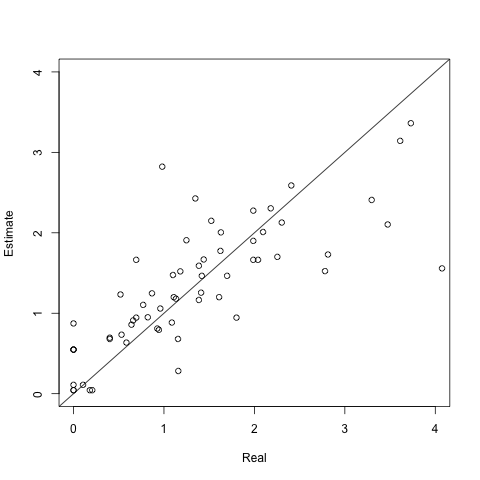

In [6]:
%%R
pred.lm <- predict(fit.lm,birdextinct[,3:5])
plot(logtime,pred.lm,xlim=c(0,4),ylim=c(0,4),xlab="Real",ylab="Estimate")
abline(0,1)

In [17]:
%%R
#Data for MCMC
regdata <- NULL
for(i in 1:nrow(birdextinct)){
  X <- as.matrix(cbind(1,birdextinct[i,3:5]))
  y <- logtime[i]
  regdata[[i]] <- list(X=X,y=y)}
Data <- list(regdata=regdata)

In [18]:
%%R
R <- 10000
Mcmc <- list(R=R)

In [19]:
%%R
#Fitting hierarchical bayes model with MCMC
out <- rhierLinearModel(Data=Data,Mcmc=Mcmc)

Z not specified -- putting in iota
 
Starting Gibbs Sampler for Linear Hierarchical Model
    62  Regressions
    1  Variables in Z (if 1, then only intercept)
 
Prior Parms: 
Deltabar
     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
A
     [,1]
[1,] 0.01
nu.e (d.f. parm for regression error variances)=  3
Vbeta ~ IW(nu,V)
nu =  7
V 
     [,1] [,2] [,3] [,4]
[1,]    7    0    0    0
[2,]    0    7    0    0
[3,]    0    0    7    0
[4,]    0    0    0    7
 
MCMC parms: 
R=  10000  keep=  1
 
MCMC Iteration (est time to end - min) 
  100  ( 1.1 )
  200  ( 1 )
  300  ( 1 )
  400  ( 1 )
  500  ( 1 )
  600  ( 1 )
  700  ( 1 )
  800  ( 0.9 )
  900  ( 0.9 )
  1000  ( 0.9 )
  1100  ( 0.9 )
  1200  ( 0.9 )
  1300  ( 0.9 )
  1400  ( 0.9 )
  1500  ( 0.9 )
  1600  ( 0.9 )
  1700  ( 0.9 )
  1800  ( 0.8 )
  1900  ( 0.8 )
  2000  ( 0.8 )
  2100  ( 0.8 )
  2200  ( 0.8 )
  2300  ( 0.8 )
  2400  ( 0.8 )
  2500  ( 0.8 )
  2600  ( 0.8 )
  2700  ( 0.8 )
  2800  ( 0.7 )
  2900  ( 0.7 )
  3000  ( 0.7 )
  

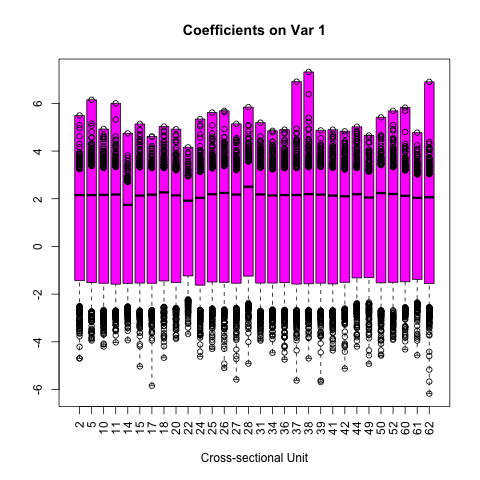

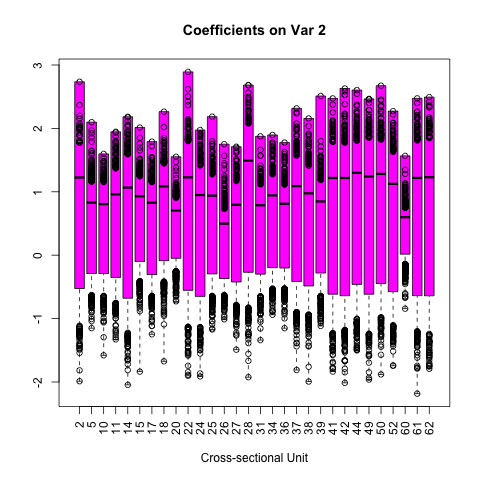

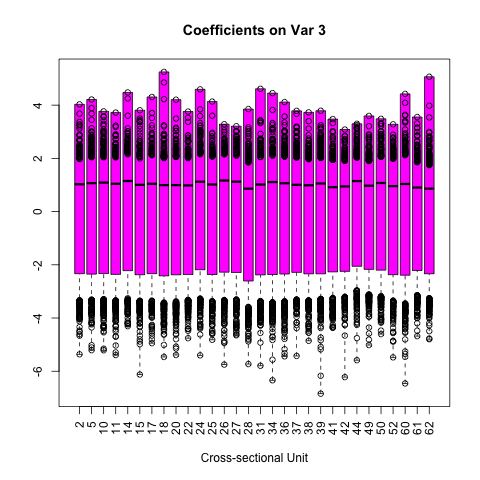

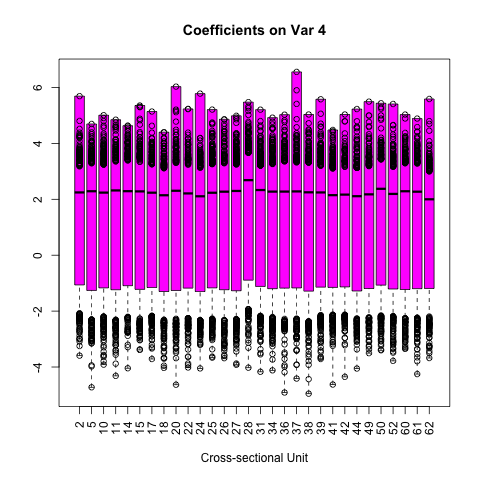

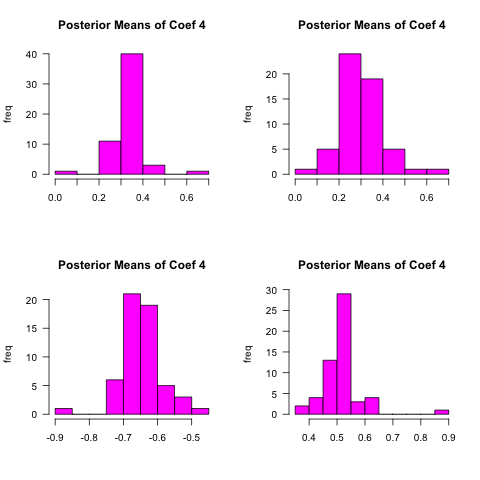

In [20]:
%%R
plot(out$betadraw)

In [21]:
%%R
beta <- data.frame()
for (i in 1:nrow(birdextinct)){
  tmp <- rowMeans(out$betadraw[i,,seq(2000,10000)])
  beta <- rbind(beta,tmp)
}
colnames(beta) <- c("I",colnames(birdextinct)[3:5])
head(beta)

          I   nesting       size    status
1 0.2752723 0.3102506 -0.6289971 0.5178800
2 0.3192282 0.3446998 -0.6536920 0.5836791
3 0.3188112 0.3239660 -0.6357751 0.5843353
4 0.1373747 0.2745122 -0.5803072 0.3801106
5 0.2850568 0.2719568 -0.6133260 0.5195782
6 0.2184271 0.2883077 -0.5948283 0.5432689


In [22]:
%%R
apply(beta,2,mean)

         I    nesting       size     status 
 0.2885805  0.3054846 -0.6259185  0.5233694 


In [23]:
%%R
# Apply the original data to the model
pred.blm <- c()
for(i in 1:nrow(birdextinct)){
  pred.blm <- c(pred.blm,sum(beta[i,] * cbind(1,birdextinct[i,3:5])))
}

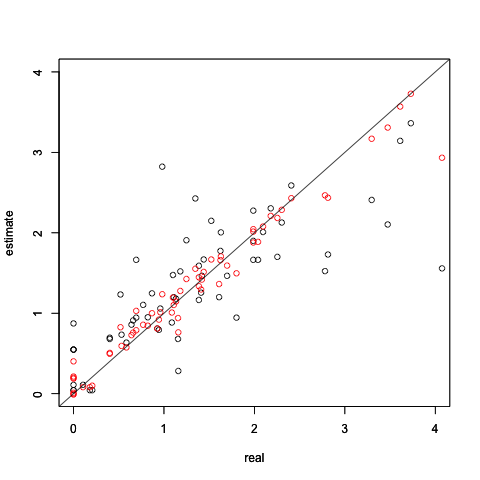

In [24]:
%%R
#Comparison GLM vs Bayesian model 
plot(logtime,pred.lm,xlim=c(0,4),ylim=c(0,4),xlab="real", ylab="estimate")
par(new=T)
plot(logtime,pred.blm,,xlim=c(0,4),ylim=c(0,4),xlab="real",ylab="estimate",col=2)
abline(0,1)

In [25]:
%%R
R2.blm <- 1 - sum((logtime - pred.blm)^2) / sum((logtime - mean(logtime))^2)
R2.blm

[1] 0.9540017


In [26]:
%%R
R2.lm <- 1 - sum((logtime - pred.lm)^2) / sum((logtime - mean(logtime))^2)
R2.lm

[1] 0.5982319
